PREDICTING STOCK DATA 

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

IMPORT DATA

In [23]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 1, 1)
tesla = pdr.DataReader("TSLA", 'yahoo', start, end)
bmw = pdr.DataReader("BMWYY", 'yahoo', start, end)
ford = pdr.DataReader("F", 'yahoo', start, end)
gm = pdr.DataReader("GM", 'yahoo', start, end)
honda = pdr.DataReader("HMC", 'yahoo', start, end)
hyundai = pdr.DataReader("HYMTF", 'yahoo', start, end)

In [24]:
bmw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.120001,23.750000,23.750000,23.879999,102000.0,17.555784
2012-01-04,24.250000,24.010000,24.110001,24.129999,42500.0,17.739580
2012-01-05,24.100000,23.790001,24.010000,24.040001,24400.0,17.673412
2012-01-06,23.840000,23.320000,23.840000,23.510000,14400.0,17.283775
2012-01-09,24.309999,23.930000,24.280001,24.290001,32700.0,17.857206


In [25]:
bmw.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000
mean,32.853680,32.448705,32.653072,32.678149,7.011647e+04,27.327252
std,4.660051,4.649879,4.657423,4.660890,1.808276e+05,4.243314
min,22.299999,21.809999,22.299999,21.990000,4.400000e+03,16.750254
25%,29.510000,29.139999,29.330000,29.350000,2.640000e+04,24.417868
50%,32.000000,31.680000,31.850000,31.870001,3.980000e+04,27.868908
75%,36.400002,35.950001,36.150002,36.200001,6.510000e+04,30.582350
max,43.480000,42.830002,43.060001,43.320000,5.827200e+06,35.836704


VISUALIZING OPEN PRICES OF ALL MANUFACTURERS BY EACH DAY

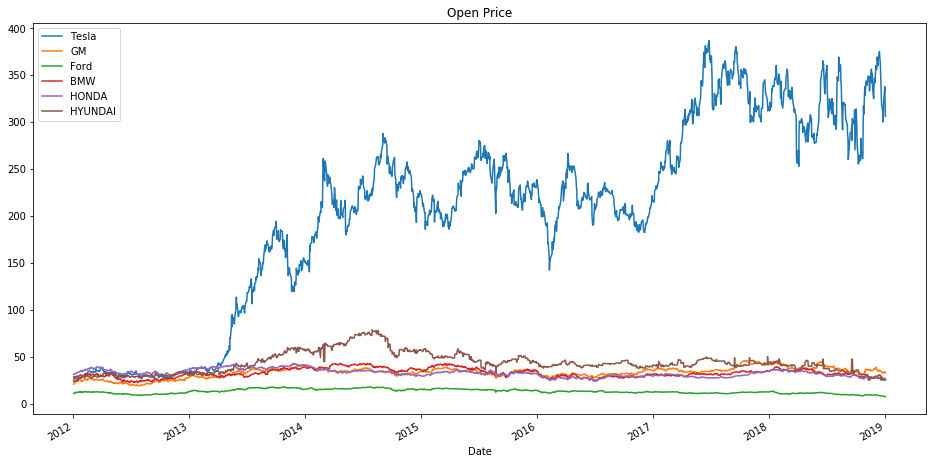

In [26]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
bmw['Open'].plot(label='BMW')
honda['Open'].plot(label='HONDA')
hyundai['Open'].plot(label='HYUNDAI')
plt.legend()

In [27]:
#Thorugh the visualization we can say that the highest open price is for Tesla.  
#The highest is on 
display(tesla['Open'].idxmax()) 
display(tesla['Open'].max())

Timestamp('2017-06-26 00:00:00')

386.69000244140625

VISUALIZING VOLUME OF STOCK TRADED EACH DAY

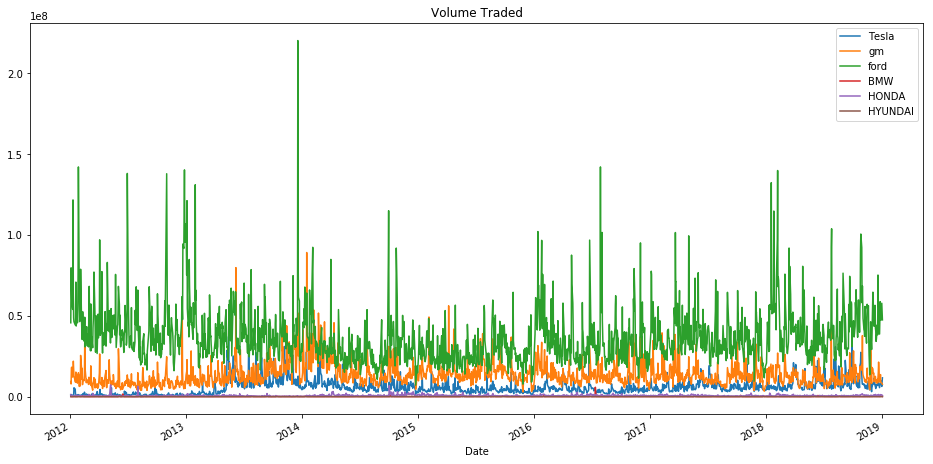

In [28]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
bmw['Volume'].plot(label='BMW')
honda['Volume'].plot(label='HONDA')
hyundai['Volume'].plot(label='HYUNDAI')
plt.legend()

In [31]:
#From the visualization we can say that the highest volume of stocks traded is by ford.
#The highest is on 
display(ford['Volume'].idxmax())
display(ford['Volume'].max())

Timestamp('2013-12-18 00:00:00')

220363000.0

CALCULATING TOTAL TRADES FOR EACH MANUFACTURER

In [32]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
bmw['Total Traded'] = bmw['Open']*bmw['Volume']
honda['Total Traded'] = honda['Open']*honda['Volume']
hyundai['Total Traded'] = hyundai['Open']*hyundai['Volume']

VISUALIZING TOTAL TRADES

Text(0, 0.5, 'Total Traded')

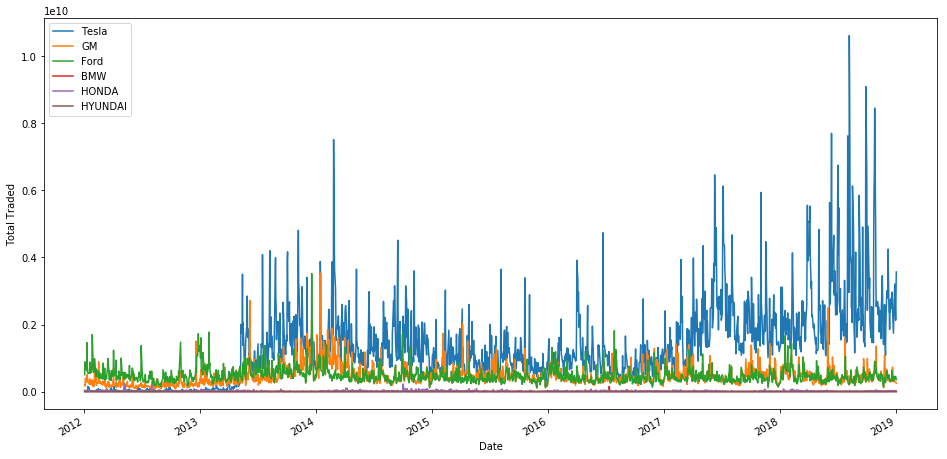

In [33]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
bmw['Total Traded'].plot(label='BMW')
honda['Total Traded'].plot(label='HONDA')
hyundai['Total Traded'].plot(label='HYUNDAI')
plt.legend()
plt.ylabel('Total Traded')

In [36]:
#The highest total trades are by Tesla
display(tesla['Total Traded'].idxmax())
display(tesla['Total Traded'].max())

Timestamp('2018-08-07 00:00:00')

10616334958.929443

Checking relation between manufacturers

In [37]:
from pandas.plotting import scatter_matrix
open_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open'],bmw['Open'],honda['Open'],hyundai['Open']],axis=1)
open_comp.columns = ['Tesla Open','GM Open','Ford Open','BMW Open','Honda Open','Hyundai Open']
open_comp.head()

,Tesla Open,GM Open,Ford Open,BMW Open,Honda Open,Hyundai Open
Date,,,,,,
2012-01-03,28.940001,20.830000,11.00,23.750000,31.180000,25.250000
2012-01-04,28.209999,21.049999,11.15,24.110001,31.650000,27.799999
2012-01-05,27.760000,21.100000,11.33,24.010000,31.650000,28.350000
2012-01-06,27.200001,22.260000,11.74,23.840000,31.990000,28.500000
2012-01-09,27.000000,23.200001,11.83,24.280001,32.099998,28.750000


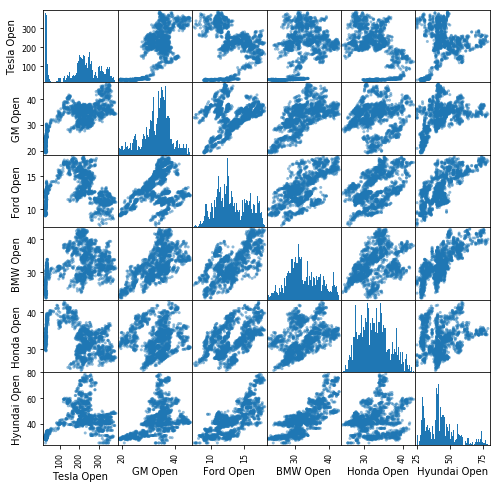

In [39]:
scatter_matrix(open_comp,figsize=(8,8),alpha=0.5,hist_kwds={'bins':100});

In [49]:
ret_comp = open_comp.pct_change()

corr = ret_comp.corr()

In [47]:
ret_comp.head()

,Tesla Open,GM Open,Ford Open,BMW Open,Honda Open,Hyundai Open
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.025225,0.010562,0.013636,0.015158,0.015074,0.100990
2012-01-05,-0.015952,0.002375,0.016144,-0.004148,0.000000,0.019784
2012-01-06,-0.020173,0.054976,0.036187,-0.007080,0.010743,0.005291
2012-01-09,-0.007353,0.042228,0.007666,0.018456,0.003439,0.008772


SCATTER PLOT

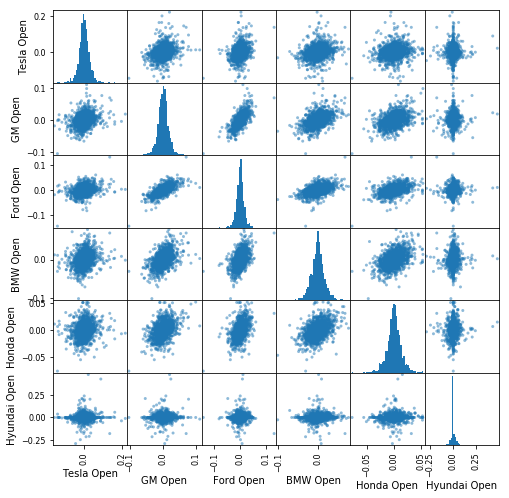

In [48]:
scatter_matrix(ret_comp,figsize=(8,8),alpha=0.5,hist_kwds={'bins':50});

HEAT MAP

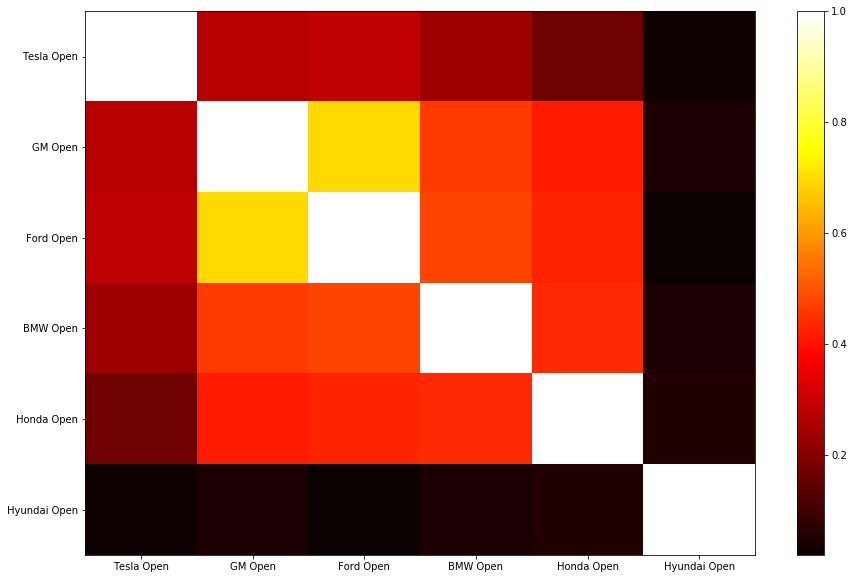

In [51]:
plt.figure(figsize = (15,10))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Text(-0.03, 0.015, 'B U Y')

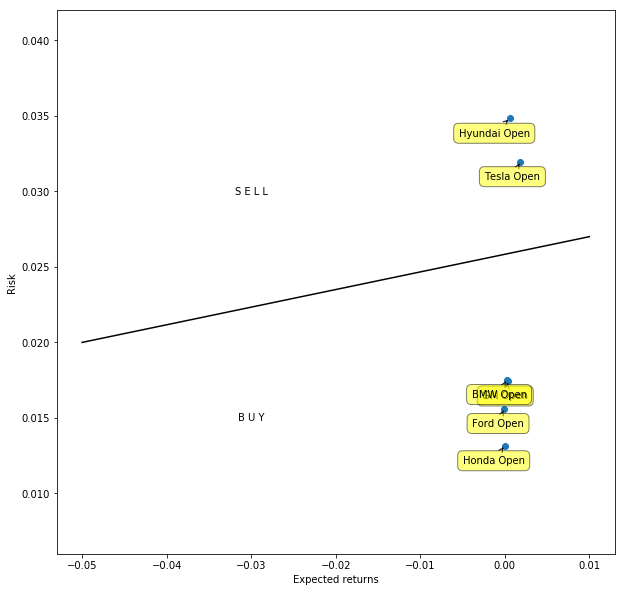

In [88]:
plt.figure(figsize = (10,10))
plt.scatter(ret_comp.mean(), ret_comp.std())
plt.plot([-0.05, 0.01], [0.020,0.027], 'k-')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(ret_comp.columns, ret_comp.mean(), ret_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
from pylab import figure, text, scatter, show
text(-0.03, 0.03,'S E L L',
     horizontalalignment='center',
     verticalalignment='center')
text(-0.03, 0.015,'B U Y',
     horizontalalignment='center',
     verticalalignment='center')

Predicting and Forecasting Stock Prices

In [89]:
dfreg = tesla.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (tesla['High'] - tesla['Low']) / tesla['Close'] * 100.0
dfreg['PCT_change'] = (tesla['Close'] - tesla['Open']) / tesla['Open'] * 100.0

In [90]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2012-01-03,28.080000,928100,6.588320,-2.971668
2012-01-04,27.709999,630100,4.222303,-1.772421
2012-01-05,27.120001,1005500,3.982300,-2.305473
2012-01-06,26.910000,986300,5.128209,-1.066180
2012-01-09,27.250000,897000,5.027519,0.925926


Preprocessing Data for Prediction

In [91]:
import math
from sklearn import preprocessing
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [92]:
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
X = preprocessing.scale(X)

In [93]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [94]:
y = np.array(dfreg['label'])
y = y[:-forecast_out]

Building Prediction Model

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#from sklearn.linear_model import Ridge
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline

LINEAR REGRESSION

In [96]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [121]:
# KNN 
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [122]:
confidencereg = clfreg.score(X_test, y_test)
confidenceknn = clfknn.score(X_test, y_test)
print('Accuracy for Linear Regression is',confidencereg)
print('Accuracy for KNN  is',confidenceknn)

Accuracy for Linear Regression is 0.9307778511482816
Accuracy for KNN  is 0.9016844934572216


Since the accuracy is high for linear regression, we will predict the stocks using the same.

In [124]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

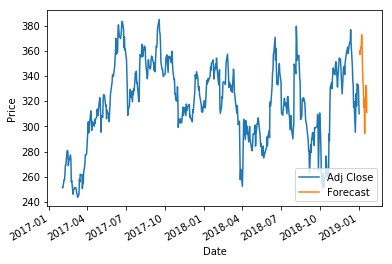

In [125]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()